In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import subprocess
from multiprocessing import Pool
from functools import partial
import imageio
import random

In [3]:
## Not relevant ## Converting simple cylinder 2 images all to shadow images

image_filepath = "/home/carter/Documents/Research/Durfee/2D IPSII"

# for i in range(1,2):
#     for j in range(1,2):
#         image = mpimg.imread(image_filepath+'m'+str(i).zfill(3)+"/test"+str(i).zfill(3)+str(j).zfill(3)+".png")
#         gimg = np.dot(image, [0.2989, 0.5870, 0.1140])
#         mytrutharray = (gimg[int(np.shape(gimg)[0]/2)-1][int(np.shape(gimg)[1]/2)-1] < gimg) & (gimg < gimg[0][0])
#         image[mytrutharray] = 0
#         image[np.logical_not(mytrutharray)] = 1
#         mpimg.imsave(image_filepath+"shadows/"+'m'+str(i).zfill(3)+"/testshadow"+str(i).zfill(3)+str(j).zfill(3)+".png", image)

image = mpimg.imread(image_filepath+"/test2.png")
gimg = np.dot(image, [0.2989, 0.5870, 0.1140])
mytrutharray = (gimg[int(np.shape(gimg)[0]/2)-1][int(np.shape(gimg)[1]/2)-1] < gimg) & (gimg < gimg[0][0])
image[mytrutharray] = 0
image[np.logical_not(mytrutharray)] = 1
mpimg.imsave(image_filepath+"/testshadow.png", image)


In [3]:
#These should be creating greyscale images of the object

image_filepath = "/home/carter/Documents/Research/simple cylinder 2/32x32/"
image = mpimg.imread(image_filepath+"test.png")
gimg32 = np.dot(image, [0.2989, 0.5870, 0.1140])

image_filepath = "/home/carter/Documents/Research/simple cylinder 2/64x64/"
image = mpimg.imread(image_filepath+"test.png")
gimg64 = np.dot(image, [0.2989, 0.5870, 0.1140])

image_filepath = "/home/carter/Documents/Research/simple cylinder 2/128x128/"
image = mpimg.imread(image_filepath+"test.png")
gimg128 = np.dot(image, [0.2989, 0.5870, 0.1140])

image_filepath = "/home/carter/Documents/Research/simple cylinder 2/256x256/"
image = mpimg.imread(image_filepath+"test.png")
gimg256 = np.dot(image, [0.2989, 0.5870, 0.1140])

image_filepath = "/home/carter/Documents/Research/simple cylinder 2/512x512/"
image = mpimg.imread(image_filepath+"test.png")
gimg512 = np.dot(image, [0.2989, 0.5870, 0.1140])

In [4]:
def transform_with_shadow(object_arr, reflectivity_arr, folder, size, num_digits):
    Object = object_arr
    Reflectivity = reflectivity_arr
    
    Nrow = np.shape(Object)[0] # num rows
    Ncol = np.shape(Object)[1] # num columns

    xr = range(Nrow)
    xc = range(Ncol)
    XC,XR = np.meshgrid(xc,xr)
    integrand = np.empty(np.shape(Object), dtype=np.complex)
    IPSII = np.empty(np.shape(Object), dtype=np.complex)
    image_filepath = "/home/carter/Documents/Research/simple cylinder 2/"+folder+"/shadows"
    
    for m in range(size):
        for n in range(size):
            
            shadow = mpimg.imread(image_filepath+'/m'+str(m+1).zfill(num_digits)+"/test"+str(m+1).zfill(num_digits)+str(n+1).zfill(num_digits)+".png")[:,:,0]
            
            integrand = Reflectivity*np.exp((-1j)*2*np.pi*(m*XR/Nrow + n*XC/Ncol))*shadow
            IPSII[m,n] = sum(sum(integrand))
            
## theta = np.arcsin(l*np.sqrt(((m*deltakm)**2)+((n*deltakn)**2))/2)
## phi = np.arctan()
            
    return IPSII

In [5]:
## Inverting the greyscale images made previously

mytrutharray32 = (gimg32[int(np.shape(gimg32)[0]/2)-1][int(np.shape(gimg32)[1]/2)-1] < gimg32)
revgimg32 = np.empty(np.shape(gimg32))
revgimg32[mytrutharray32] = 0
revgimg32[np.logical_not(mytrutharray32)] = 1

mytrutharray64 = (gimg64[int(np.shape(gimg64)[0]/2)-1][int(np.shape(gimg64)[1]/2)-1] < gimg64)
revgimg64 = np.empty(np.shape(gimg64))
revgimg64[mytrutharray64] = 0
revgimg64[np.logical_not(mytrutharray64)] = 1

mytrutharray128 = (gimg128[int(np.shape(gimg128)[0]/2)-1][int(np.shape(gimg128)[1]/2)-1] < gimg128)
revgimg128 = np.empty(np.shape(gimg128))
revgimg128[mytrutharray128] = 0
revgimg128[np.logical_not(mytrutharray128)] = 1

mytrutharray256 = (gimg256[int(np.shape(gimg256)[0]/2)-1][int(np.shape(gimg256)[1]/2)-1] < gimg256)
revgimg256 = np.empty(np.shape(gimg256))
revgimg256[mytrutharray256] = 0
revgimg256[np.logical_not(mytrutharray256)] = 1

mytrutharray512 = (gimg512[int(np.shape(gimg512)[0]/2)-1][int(np.shape(gimg512)[1]/2)-1] < gimg512)
revgimg512 = np.empty(np.shape(gimg512))
revgimg512[mytrutharray512] = 0
revgimg512[np.logical_not(mytrutharray512)] = 1


In [6]:
## Creating images with random-valued pixels for testing

randomgimg32 = np.empty(np.shape(gimg32))
for m in range(np.shape(gimg32)[0]):
    for n in range(np.shape(gimg32)[1]):
        randomgimg32[m][n] = random.random()

randomgimg64 = np.empty(np.shape(gimg64))
for m in range(np.shape(gimg64)[0]):
    for n in range(np.shape(gimg64)[1]):
        randomgimg64[m][n] = random.random()
        
randomgimg128 = np.empty(np.shape(gimg128))
for m in range(np.shape(gimg128)[0]):
    for n in range(np.shape(gimg128)[1]):
        randomgimg128[m][n] = random.random()
        
randomgimg256 = np.empty(np.shape(gimg256))
for m in range(np.shape(gimg256)[0]):
    for n in range(np.shape(gimg256)[1]):
        randomgimg256[m][n] = random.random()
        
randomgimg512 = np.empty(np.shape(gimg512))
for m in range(np.shape(gimg512)[0]):
    for n in range(np.shape(gimg512)[1]):
        randomgimg512[m][n] = random.random()

In [ ]:
IPSII32ones = transform_with_shadow(gimg32, np.ones(np.shape(gimg32)), "32x32", 32, 2)
IPSII64ones = transform_with_shadow(gimg64, np.ones(np.shape(gimg64)), "64x64", 64, 2)
IPSII128ones = transform_with_shadow(gimg128, np.ones(np.shape(gimg128)), "128x128", 128, 3)
IPSII256ones = transform_with_shadow(gimg256, np.ones(np.shape(gimg256)), "256x256", 256, 3)
IPSII512ones = transform_with_shadow(gimg512, np.ones(np.shape(gimg512)), "512x512", 512, 3)

In [ ]:
IPSII32zeros = transform_with_shadow(gimg32, np.zeros(np.shape(gimg32)), "32x32", 32, 2)
IPSII64zeros = transform_with_shadow(gimg64, np.zeros(np.shape(gimg64)), "64x64", 64, 2)
IPSII128zeros = transform_with_shadow(gimg128, np.zeros(np.shape(gimg128)), "128x128", 128, 3)
IPSII256zeros = transform_with_shadow(gimg256, np.zeros(np.shape(gimg256)), "256x256", 256, 3)
IPSII512zeros = transform_with_shadow(gimg512, np.zeros(np.shape(gimg512)), "512x512", 512, 3)

In [ ]:
IPSII32copy = transform_with_shadow(gimg32, np.copy(gimg32), "32x32", 32, 2)
IPSII64copy = transform_with_shadow(gimg64, np.copy(gimg64), "64x64", 64, 2)
IPSII128copy = transform_with_shadow(gimg128, np.copy(gimg128), "128x128", 128, 3)
IPSII256copy = transform_with_shadow(gimg256, np.copy(gimg256), "256x256", 256, 3)
IPSII512copy = transform_with_shadow(gimg512, np.copy(gimg512), "512x512", 512, 3)

In [ ]:
IPSII32rev = transform_with_shadow(gimg32, revgimg32, "32x32", 32, 2)
IPSII64rev = transform_with_shadow(gimg64, revgimg64, "64x64", 64, 2)
IPSII128rev = transform_with_shadow(gimg128, revgimg128, "128x128", 128, 3)
IPSII256rev = transform_with_shadow(gimg256, revgimg256, "256x256", 256, 3)
IPSII512rev = transform_with_shadow(gimg512, revgimg512, "512x512", 512, 3)

In [ ]:
IPSII32random = transform_with_shadow(gimg32, randomgimg32, "32x32", 32, 2)
IPSII64random = transform_with_shadow(gimg64, randomgimg64, "64x64", 64, 2)
IPSII128random = transform_with_shadow(gimg128, randomgimg128, "128x128", 128, 3)
IPSII256random = transform_with_shadow(gimg256, randomgimg256, "256x256", 256, 3)
IPSII512random = transform_with_shadow(gimg512, randomgimg512, "512x512", 512, 3)

In [ ]:
## Saving all IPSII data

pixels = [32, 64, 128, 256, 512]
mylist = [ones, zeros, copy, rev, random]

for n in mylist:
    for m in pixels:
        myfile = open('IPSII'+str(pixels[m])+mylist[n]+'.csv','w')
        with myfile:
            writer = csv.writer(myfile)
            writer.writerows('IPSII'+str(pixels[m])+mylist[n])
        myfile.close()



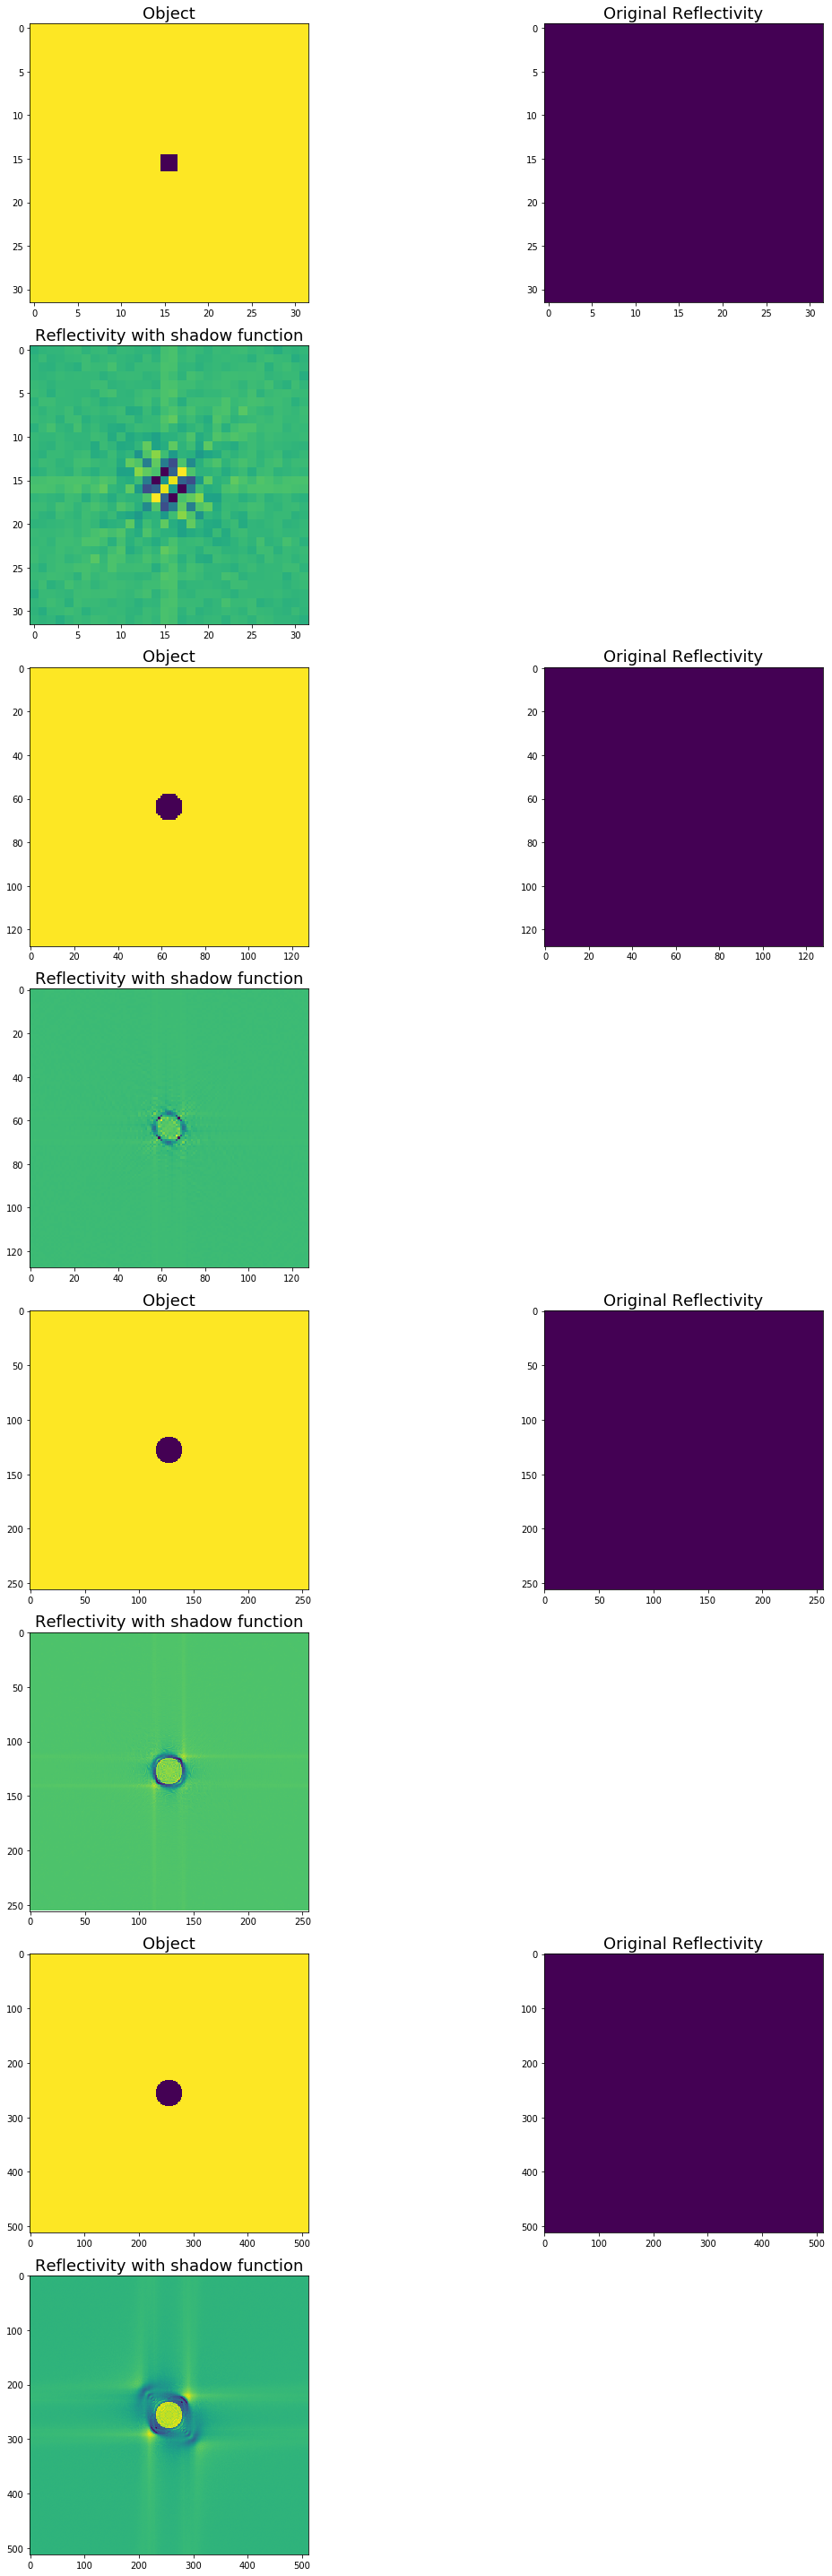

In [74]:
plt.subplots(figsize=(17,40))
plt.subplot(8,2,1)
plt.title('Object', fontsize=18)
plt.imshow(gimg32)

plt.subplot(8,2,2)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.ones(np.shape(gimg32)))

plt.subplot(8,2,3)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII32ones).real)

# plt.subplot(10,2,5)
# plt.title('Object', fontsize=18)
# plt.imshow(gimg64)

# plt.subplot(10,2,6)
# plt.title('Original Reflectivity', fontsize=18)
# plt.imshow(np.ones(np.shape(gimg64)))

# plt.subplot(10,2,7)
# plt.title('Reflectivity with shadow function', fontsize=18)
# plt.imshow(np.fft.ifft2(IPSII64ones).real)

plt.subplot(8,2,5)
plt.title('Object', fontsize=18)
plt.imshow(gimg128)

plt.subplot(8,2,6)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.ones(np.shape(gimg128)))

plt.subplot(8,2,7)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII128ones).real)

plt.subplot(8,2,9)
plt.title('Object', fontsize=18)
plt.imshow(gimg256)

plt.subplot(8,2,10)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.ones(np.shape(gimg256)))

plt.subplot(8,2,11)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII256ones).real)

plt.subplot(8,2,13)
plt.title('Object', fontsize=18)
plt.imshow(gimg512)

plt.subplot(8,2,14)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.ones(np.shape(gimg512)))

plt.subplot(8,2,15)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII512ones).real)

plt.tight_layout()
plt.show()

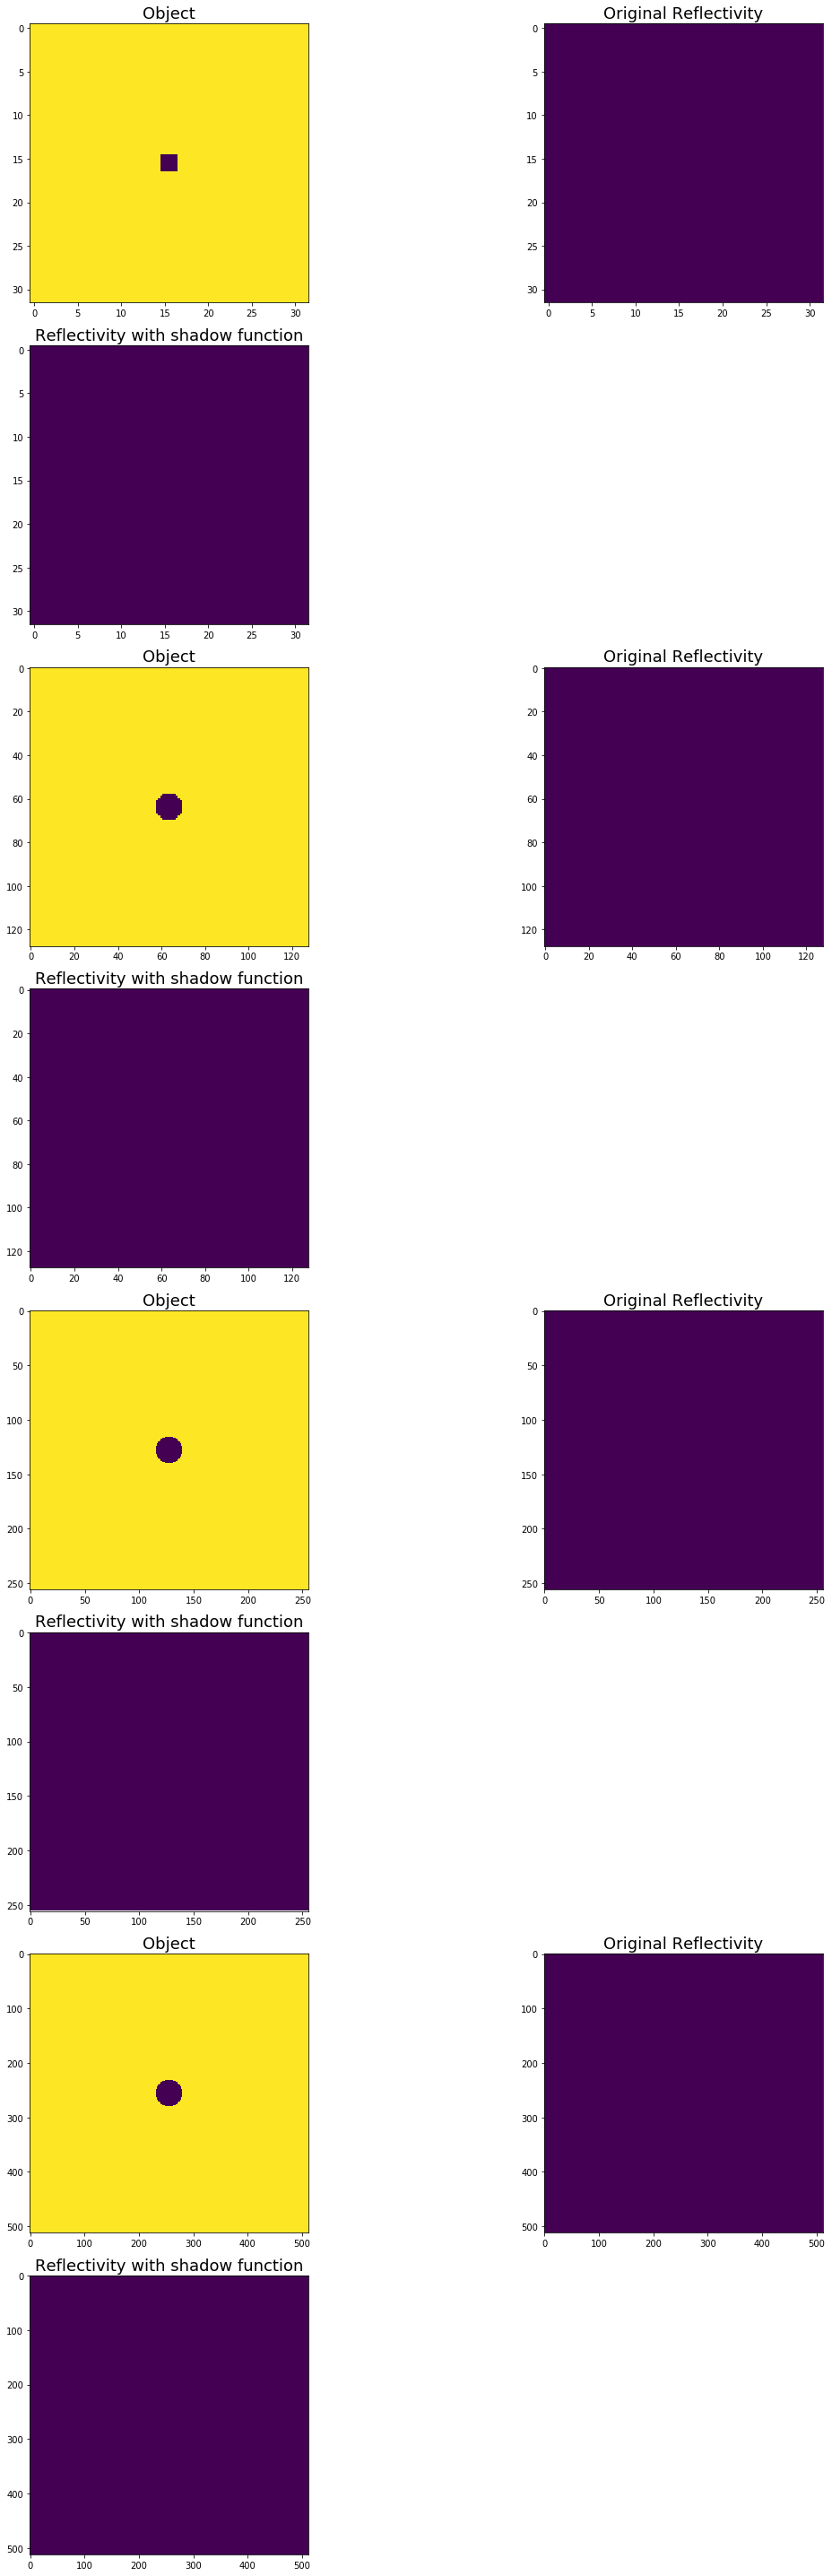

In [78]:
plt.subplots(figsize=(17,40))
plt.subplot(8,2,1)
plt.title('Object', fontsize=18)
plt.imshow(gimg32)

plt.subplot(8,2,2)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.zeros(np.shape(gimg32)))

plt.subplot(8,2,3)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII32zeros).real)

# plt.subplot(10,2,5)
# plt.title('Object', fontsize=18)
# plt.imshow(gimg64)

# plt.subplot(10,2,6)
# plt.title('Original Reflectivity', fontsize=18)
# plt.imshow(np.zeros(np.shape(gimg64)))

# plt.subplot(10,2,7)
# plt.title('Reflectivity with shadow function', fontsize=18)
# plt.imshow(np.fft.ifft2(IPSII64zeros).real)

plt.subplot(8,2,5)
plt.title('Object', fontsize=18)
plt.imshow(gimg128)

plt.subplot(8,2,6)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.zeros(np.shape(gimg128)))

plt.subplot(8,2,7)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII128zeros).real)

plt.subplot(8,2,9)
plt.title('Object', fontsize=18)
plt.imshow(gimg256)

plt.subplot(8,2,10)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.zeros(np.shape(gimg256)))

plt.subplot(8,2,11)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII256zeros).real)

plt.subplot(8,2,13)
plt.title('Object', fontsize=18)
plt.imshow(gimg512)

plt.subplot(8,2,14)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.zeros(np.shape(gimg512)))

plt.subplot(8,2,15)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII512zeros).real)

plt.tight_layout()
plt.show()

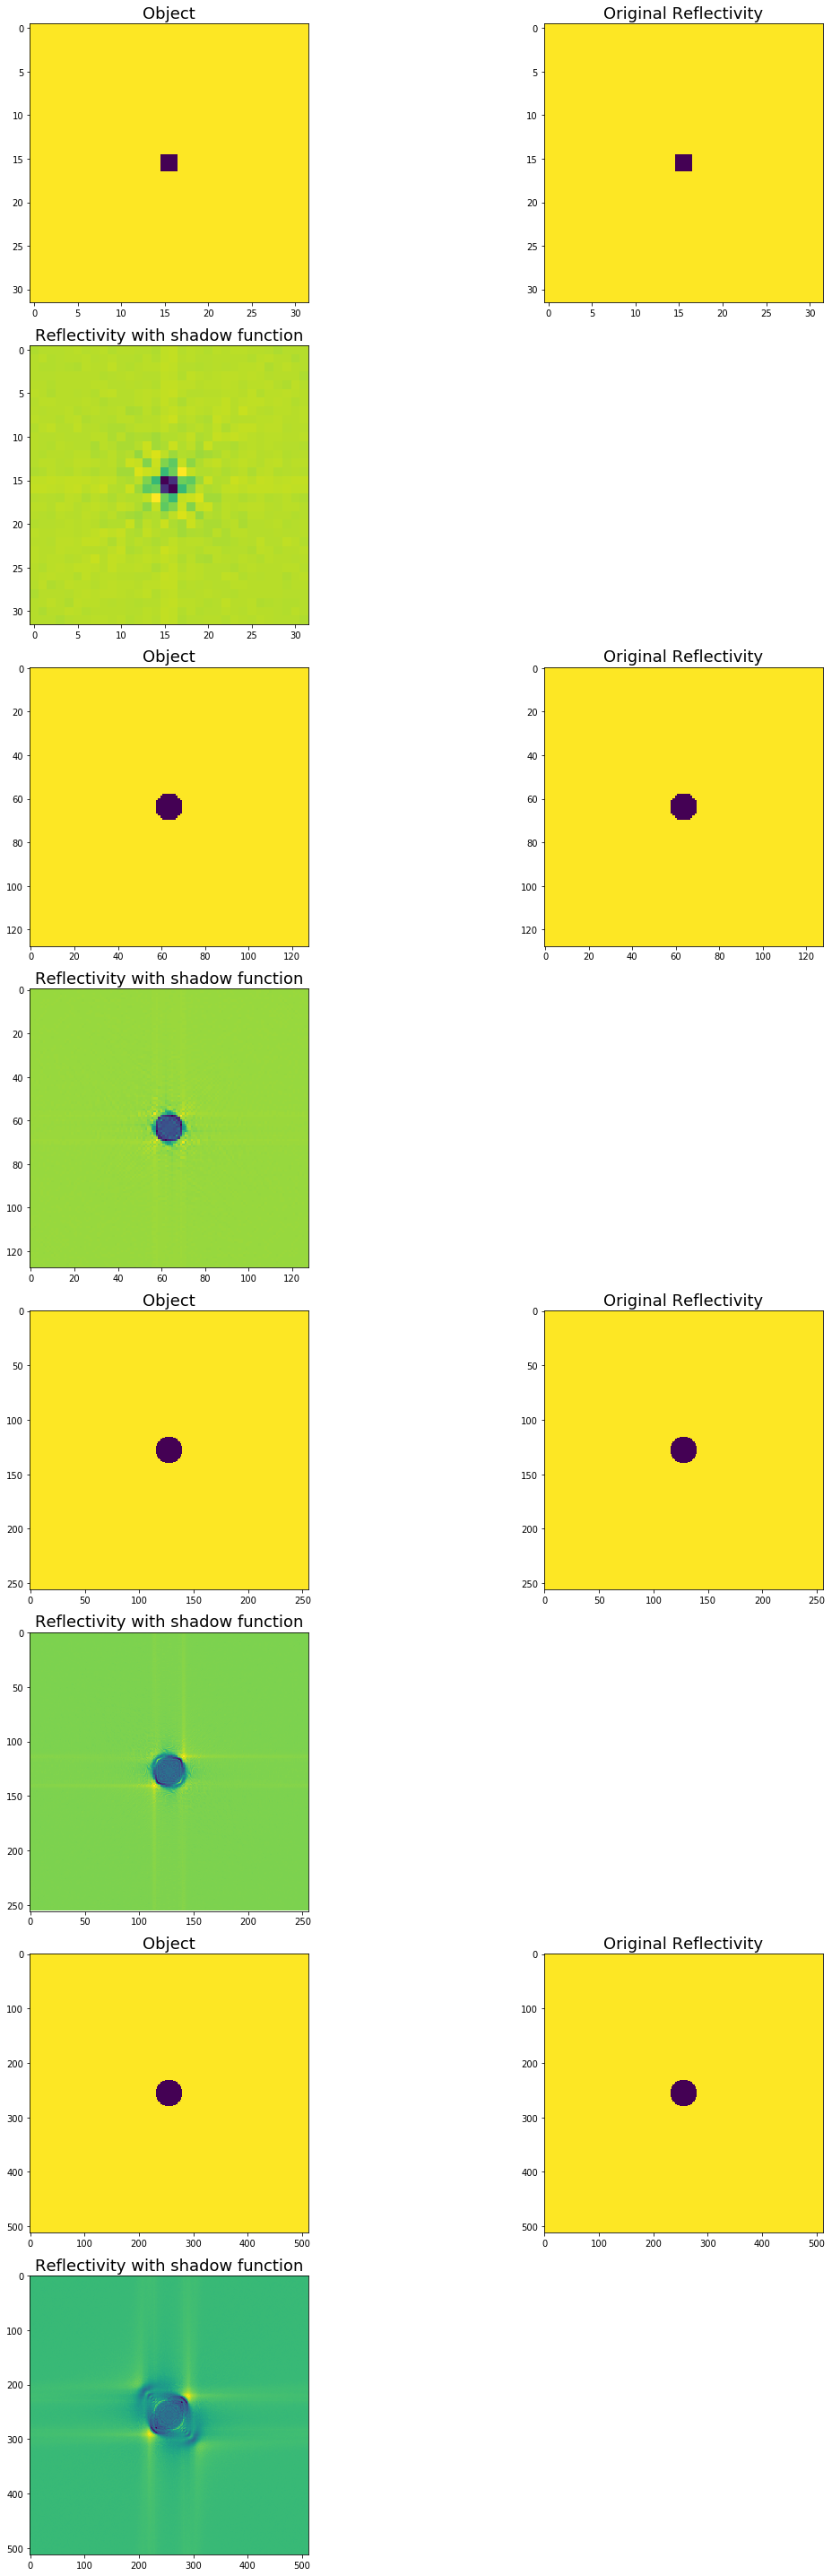

In [79]:
plt.subplots(figsize=(17,40))
plt.subplot(8,2,1)
plt.title('Object', fontsize=18)
plt.imshow(gimg32)

plt.subplot(8,2,2)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.copy(gimg32))

plt.subplot(8,2,3)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII32copy).real)

# plt.subplot(10,2,5)
# plt.title('Object', fontsize=18)
# plt.imshow(gimg64)

# plt.subplot(10,2,6)
# plt.title('Original Reflectivity', fontsize=18)
# plt.imshow(np.copy(gimg64))

# plt.subplot(10,2,7)
# plt.title('Reflectivity with shadow function', fontsize=18)
# plt.imshow(np.fft.ifft2(IPSII64copy).real)

plt.subplot(8,2,5)
plt.title('Object', fontsize=18)
plt.imshow(gimg128)

plt.subplot(8,2,6)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.copy(gimg128))

plt.subplot(8,2,7)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII128copy).real)

plt.subplot(8,2,9)
plt.title('Object', fontsize=18)
plt.imshow(gimg256)

plt.subplot(8,2,10)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.copy(gimg256))

plt.subplot(8,2,11)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII256copy).real)

plt.subplot(8,2,13)
plt.title('Object', fontsize=18)
plt.imshow(gimg512)

plt.subplot(8,2,14)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.copy(gimg512))

plt.subplot(8,2,15)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII512copy).real)

plt.tight_layout()
plt.show()

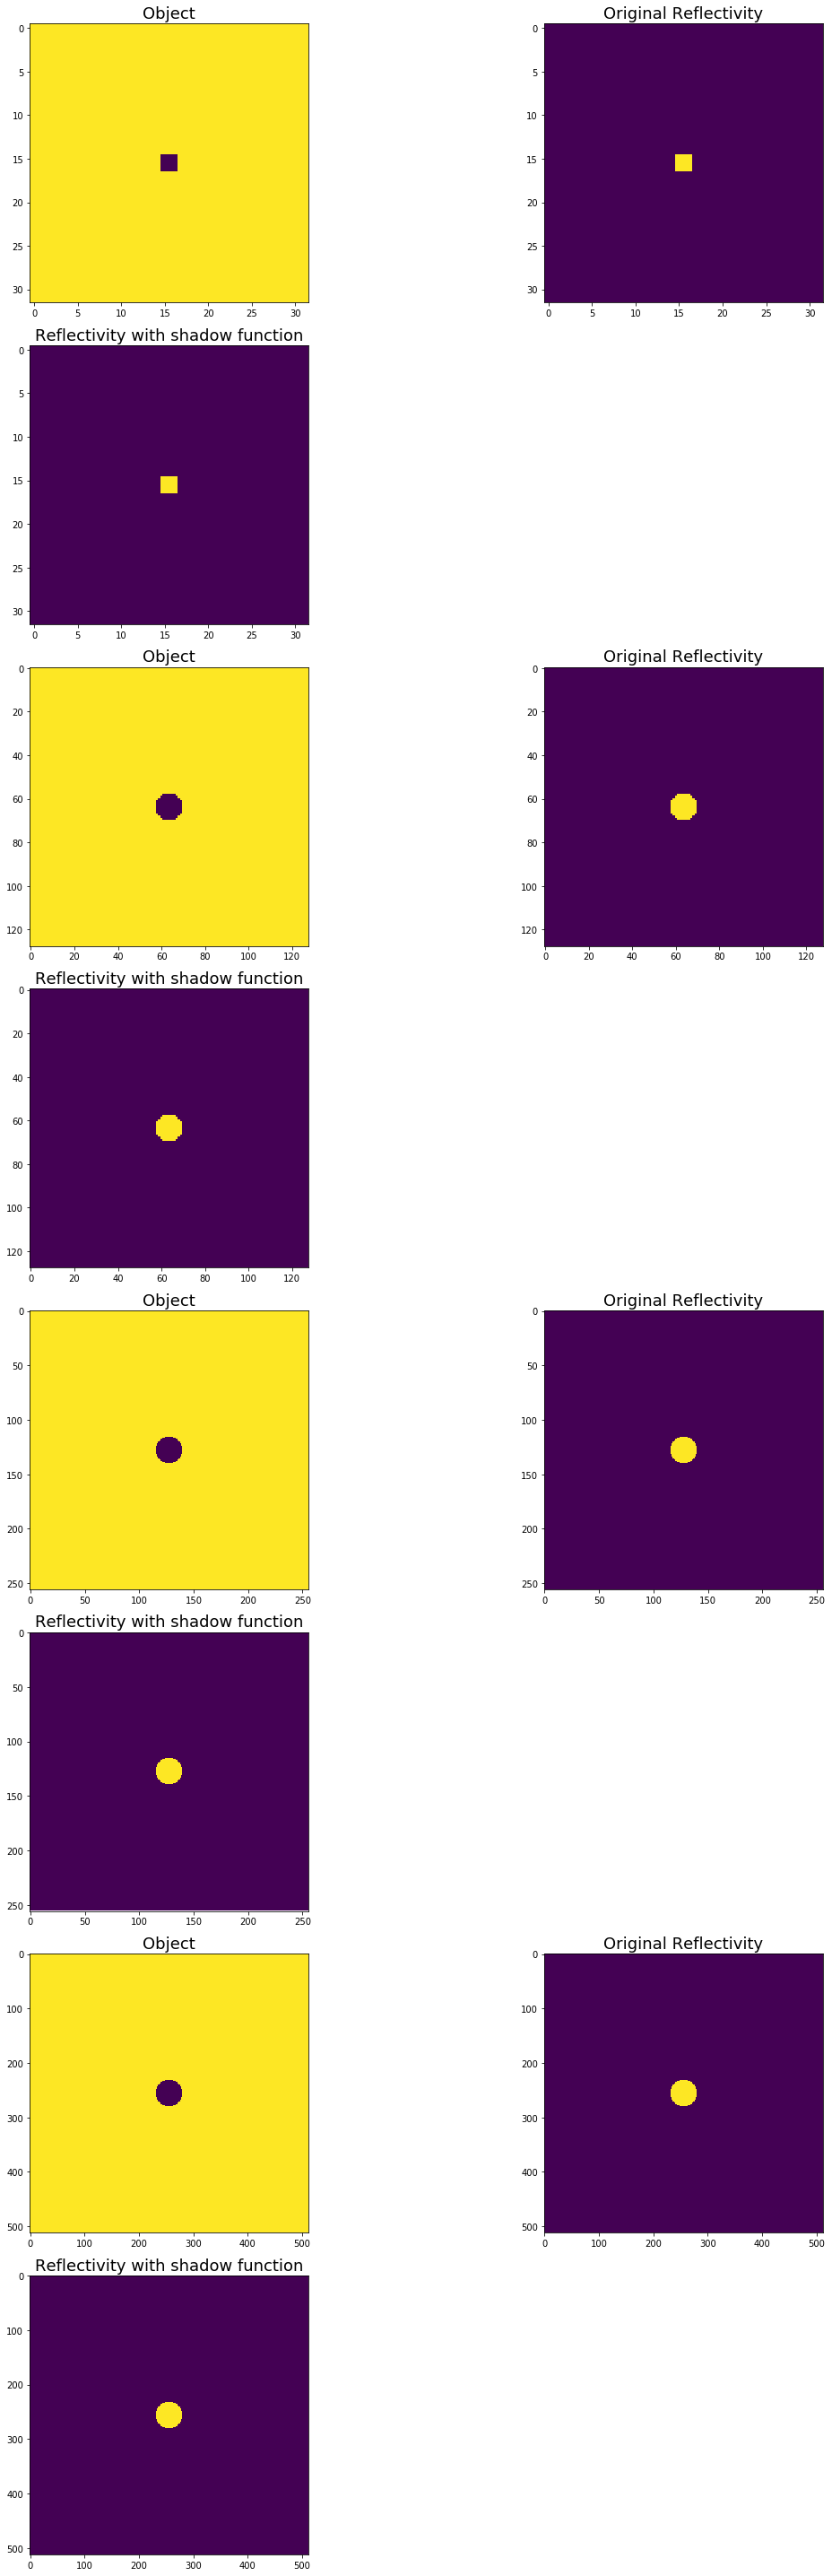

In [76]:
plt.subplots(figsize=(17,40))
plt.subplot(8,2,1)
plt.title('Object', fontsize=18)
plt.imshow(gimg32)

plt.subplot(8,2,2)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(revgimg32)

plt.subplot(8,2,3)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII32rev).real)

# plt.subplot(10,2,5)
# plt.title('Object', fontsize=18)
# plt.imshow(gimg64)

# plt.subplot(10,2,6)
# plt.title('Original Reflectivity', fontsize=18)
# plt.imshow(revgimg64)

# plt.subplot(10,2,7)
# plt.title('Reflectivity with shadow function', fontsize=18)
# plt.imshow(np.fft.ifft2(IPSII64rev).real)

plt.subplot(8,2,5)
plt.title('Object', fontsize=18)
plt.imshow(gimg128)

plt.subplot(8,2,6)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(revgimg128)

plt.subplot(8,2,7)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII128rev).real)

plt.subplot(8,2,9)
plt.title('Object', fontsize=18)
plt.imshow(gimg256)

plt.subplot(8,2,10)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(revgimg256)

plt.subplot(8,2,11)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII256rev).real)

plt.subplot(8,2,13)
plt.title('Object', fontsize=18)
plt.imshow(gimg512)

plt.subplot(8,2,14)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(revgimg512)

plt.subplot(8,2,15)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII512rev).real)

plt.tight_layout()
plt.show()

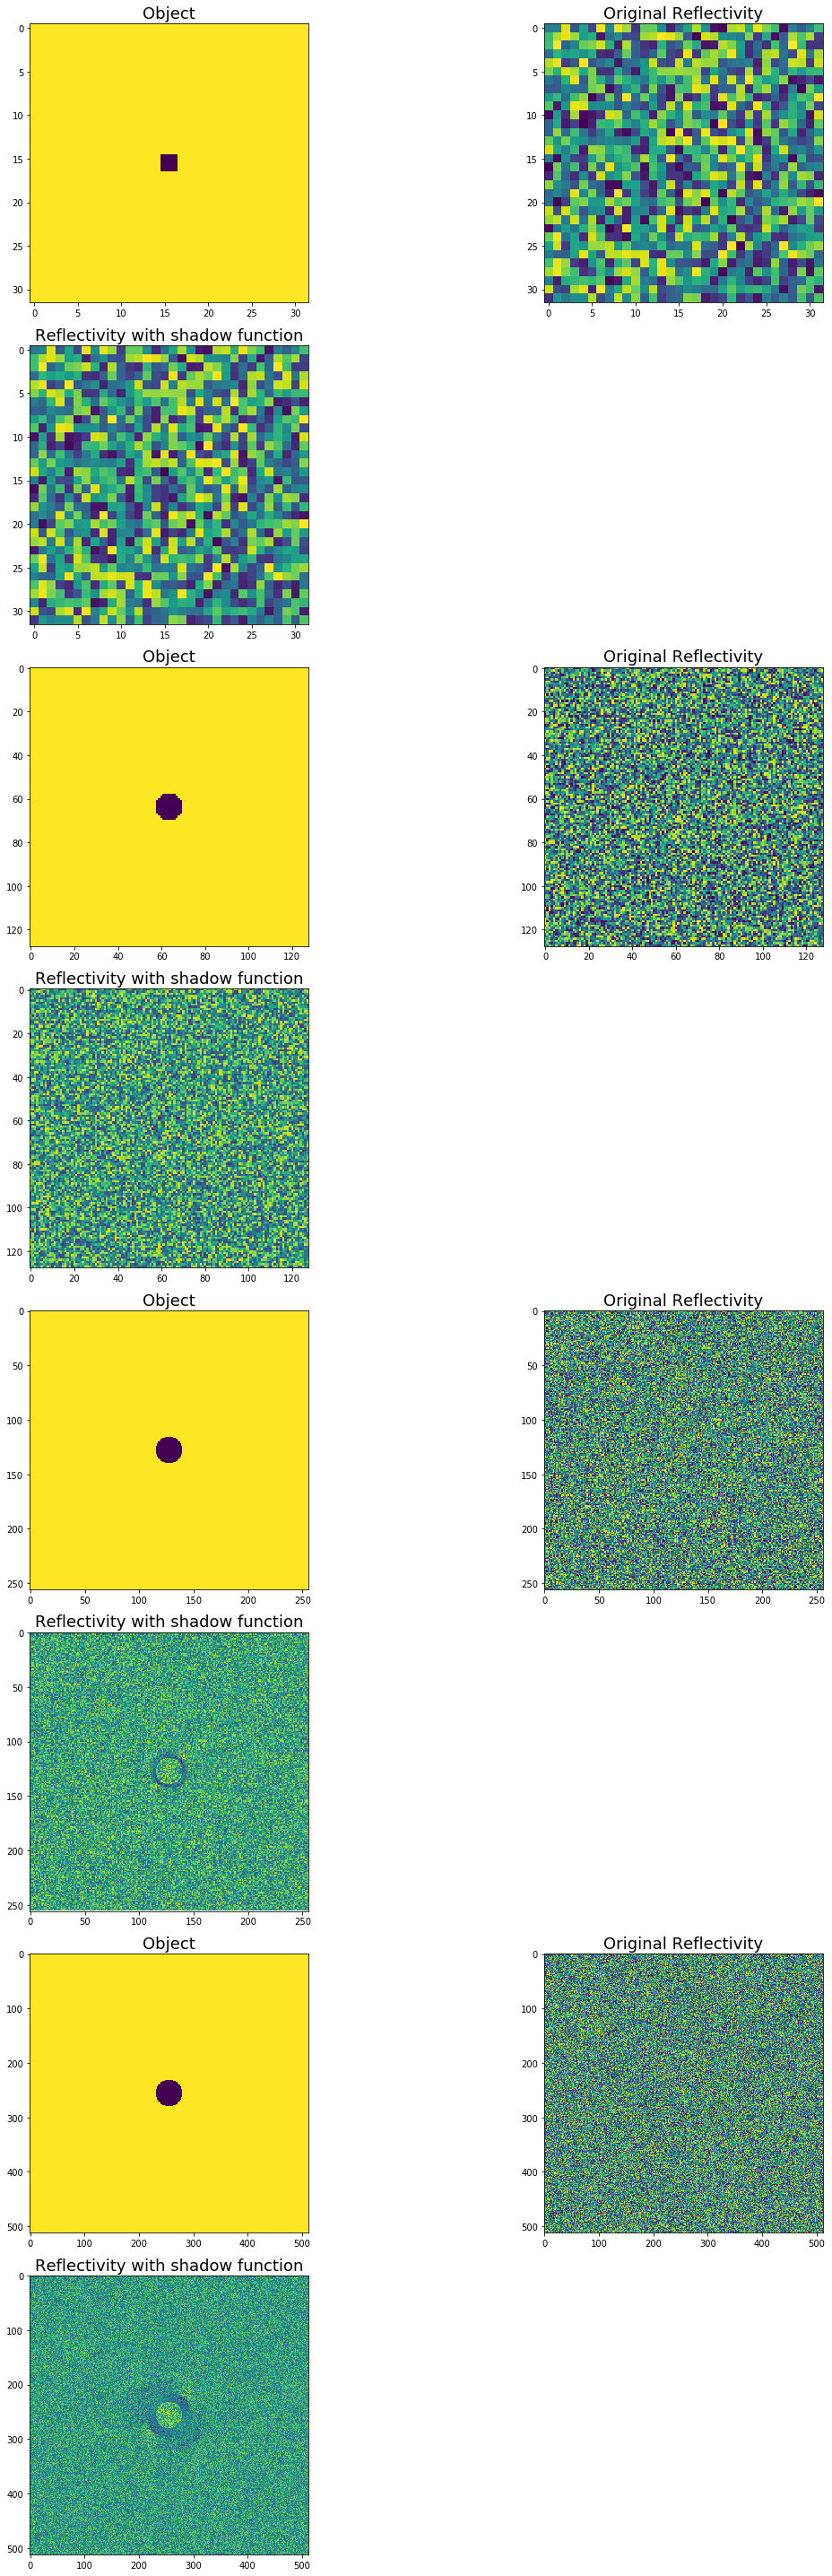

In [77]:
plt.subplots(figsize=(17,40))
plt.subplot(8,2,1)
plt.title('Object', fontsize=18)
plt.imshow(gimg32)

plt.subplot(8,2,2)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(randomgimg32)

plt.subplot(8,2,3)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII32random).real)

# plt.subplot(10,2,5)
# plt.title('Object', fontsize=18)
# plt.imshow(gimg64)

# plt.subplot(10,2,6)
# plt.title('Original Reflectivity', fontsize=18)
# plt.imshow(randomgimg64)

# plt.subplot(10,2,7)
# plt.title('Reflectivity with shadow function', fontsize=18)
# plt.imshow(np.fft.ifft2(IPSII64random).real)

plt.subplot(8,2,5)
plt.title('Object', fontsize=18)
plt.imshow(gimg128)

plt.subplot(8,2,6)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(randomgimg128)

plt.subplot(8,2,7)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII128random).real)

plt.subplot(8,2,9)
plt.title('Object', fontsize=18)
plt.imshow(gimg256)

plt.subplot(8,2,10)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(randomgimg256)

plt.subplot(8,2,11)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII256random).real)

plt.subplot(8,2,13)
plt.title('Object', fontsize=18)
plt.imshow(gimg512)

plt.subplot(8,2,14)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(randomgimg512)

plt.subplot(8,2,15)
plt.title('Reflectivity with shadow function', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII512random).real)

plt.tight_layout()
plt.show()